In [1]:
from lib.plot import plot2D, plot3D
from lib import graphs

G_W1, G_W8 = graphs.G_Witvliet[0], graphs.G_Witvliet[7]

%store -r SEEM_Array_Witvliet \
  RDDAM_Graphs_W1 rand_Graphs_W1 \
  RDDAM_Graphs_W8 rand_Graphs_W8 \
  SEEM_Array_Witvliet_Rand

### Plot Graphs with Neuron Positions

Drawing 2D Graphs

In [2]:
# plot2D(graphs.G_SEEM_FC)
# plot2D(graphs.G_overlap)
# plot2D(graphs.G_uniqueOG)
# plot2D(graphs.G_uniqueSEEM)

In [3]:
# plot2D(graphs.G_overlap_W1)
# plot2D(graphs.G_uniqueOG_W1)
# plot2D(graphs.G_uniqueSEEM_W1)

Drawing 3D Graphs

In [2]:
# cenn =plot3D(G_W1, 'CENN (L1)', 'cenn1', darkmode=False, nodeColor='red')
# cenn =plot3D(SEEM_Array_Witvliet[0][0], 'SEEM', 'seem1', darkmode=False, nodeColor='#1f77b4')
# cenn =plot3D(RDDAM_Graphs_W1[0], 'RDDAM', 'rddam1', darkmode=False, nodeColor='#ff7f0e')
# cenn =plot3D(rand_Graphs_W1[0], 'Erdos-Renyi', 'er1', darkmode=False, nodeColor='#2ca02c')

# cenn =plot3D(G_W8, 'CENN (L5)', 'cenn5',darkmode=False, nodeColor='red')
# cenn =plot3D(SEEM_Array_Witvliet[7][0], 'SEEM', 'seem5', darkmode=False, nodeColor='#1f77b4')
# cenn =plot3D(RDDAM_Graphs_W8[0], 'RDDAM', 'rddam5', darkmode=False, nodeColor='#ff7f0e')
# cenn =plot3D(rand_Graphs_W8[0], 'Erdos-Renyi', 'er5', darkmode=False, nodeColor='#2ca02c')

cenn =plot3D([G_W1, SEEM_Array_Witvliet[0][0], RDDAM_Graphs_W1[0], rand_Graphs_W1[0], SEEM_Array_Witvliet_Rand[0][0]], ['CENN (L1)', 'Erdos-Renyi', 'SEEM', 'REEM', 'RDDAM'], 'all1', darkmode=False, nodeColors=['red', '#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd'])
# TODO: fix col and row ordering so that ['CENN (L1)', 'SEEM', 'RDDAM', 'Erdos-Renyi', 'REEM'] works


In [ ]:
plotSEEM = plot3D(graphs.G_SEEM_FC, 'SEEM')
plotSEEM.write_image(file='data/images/plot3D_SEEM.png',format='png')

In [ ]:
cenn = plot3D(G_W8, 'CENN (Adult)')

In [ ]:
empty = plot3D(graphs.getCleanGraph(),'')

In [ ]:
cenn_W1 = plot3D(G_W1, 'CENN (W1)')

In [ ]:
cenn_W1 = plot3D(SEEM_Array_Witvliet[0][0], 'SEEM (W1)')

In [ ]:
def plot3DEdgeOverlap(G, title, presentation=True, edges=None, edgeOpacity=0.5, nodes=None):

  if presentation:
    edgeColor, nodeTraceColor, bgColor = 'white', 'black', 'black'
  else:
    edgeColor, nodeTraceColor, bgColor = 'black', 'white', 'white'
  
  nodeColor = nodes if nodes else 'red'

  if edges:
    edgeColor = edges
  #We also need a list of edges to include in the plot
  edge_list = G.edges()
  nodeDict = G.nodes(True)

  #we  need to create lists that contain the starting and ending coordinates of each edge.
  x_edges=[]
  y_edges=[]
  z_edges=[]
  
  #need to fill these with all of the coordiates
  for edge in edge_list:
      node_i = edge[0]
      node_j = edge[1]

      #format: [beginning,ending,None]
      x_coords = [nodeDict[node_i]['x'],nodeDict[node_j]['x'],None]
      x_edges += x_coords
  
      y_coords = [nodeDict[node_i]['y'],nodeDict[node_j]['y'],None]
      y_edges += y_coords
  
      z_coords = [nodeDict[node_i]['z'],nodeDict[node_j]['z'],None]
      z_edges += z_coords
  #create a trace for the edges
  trace_edges = go.Scatter3d(x=x_edges, y=y_edges, z=z_edges, mode='lines', opacity=0.5,
                        line=dict(color=edgeColor, width=4), hoverinfo='none')
  trace_edges = go.Scatter3d(x=x_edges, y=y_edges, z=z_edges, mode='lines', opacity=0.5,
                        line=dict(color=edgeColor, width=4), hoverinfo='none')

  #we need to seperate the X,Y,Z coordinates for Plotly
  x_nodes = list(nx.get_node_attributes(G,'x').values()) # x-coordinates of nodes
  y_nodes = list(nx.get_node_attributes(G,'y').values()) # x-coordinates of nodes
  z_nodes = list(nx.get_node_attributes(G,'z').values()) # x-coordinates of nodes

  #create a trace for the nodes
  trace_nodes = go.Scatter3d(x=x_nodes,
                          y=y_nodes,
                          z=z_nodes,
                          mode='markers',
                          marker=dict(symbol='circle',
                                      size=5,
                                      color=nodeColor,
                                      line=dict(color=nodeTraceColor, width=0.5))
                                      )
  #we need to set the axis for the plot 
  axis = dict(showbackground=False,
              showline=False,
              zeroline=False,
              showgrid=False,
              showticklabels=False,
              title='')
  #also need to create the layout for our plot
  layout = go.Layout(title=title,
                  width=650,
                  height=625,
                  showlegend=False, #True,
                  scene=dict(xaxis=dict(axis), yaxis=dict(axis), zaxis=dict(axis)),
                  margin=dict(t=100),
                  hovermode='closest',
                  paper_bgcolor=bgColor)
                  

  data = [trace_edges, trace_nodes]
  return data, layout

In [ ]:
graphs.G_overlap_W7_W8.number_of_edges()

560

In [ ]:
colorGraphTuples = [
  (graphs.G_unique_W7, 'red', 'W7'),
  (graphs.G_unique_W8, 'gold', 'W8'),
  (graphs.G_unique_White, 'blue', 'White'),
  (graphs.G_overlap_W7_W8, 'pink', 'Overlap W7-W8'), 
  (graphs.G_overlap_W7_White, 'purple', 'Overlap W7-White'), 
  (graphs.G_overlap_W8_White, 'green', 'Overlap W8-White'), 
  (graphs.G_overlap_W7_W8_White, 'black', 'Overlap W7-W8-White'),
]

for graph, color, title in colorGraphTuples:
  data, layout = plot3DEdgeOverlap(graph, title, presentation=False, edges='black', edgeOpacity=0.05)

  # data, layout = plot3DEdgeOverlap(graphs.G_unique_W7, 'Overlap', presentation=False, edges='red')

  # for (g,eColor) in colorGraphTuples:
  #   newData, _ = plot3DEdgeOverlap(g, 'Overlap', presentation=False, edges=eColor)
  #   data.append(newData[0])

  %config InlineBackend.figure_format ='retina'
  fig = go.Figure(data=data, layout=layout)

  # name = 'default'
  # Default parameters which are used when `layout.scene.camera` is not provided
  camera = dict(
      # up=dict(x=0.2, y=0.85, z=0.1),
      # center=dict(x=0, y=0, z=0),
      eye=dict(x=1.4, y=0, z=3)
  )

  fig.update_layout(scene_camera=camera)

  fig.show()

In [ ]:
communitySubgraphs = []

commNodes = ['test']
i = 0

while len(commNodes) > 0:
  commNodes = [node for node in graphs.G_info_All.nodes() if graphs.G_info_All.nodes[node]['community'] == i]

  if len(commNodes) == 0:
    break

  subgraph = graphs.G_info_All.copy()
  subgraph.remove_nodes_from([n for n in graphs.G_info_All.nodes() if n not in commNodes])

  communitySubgraphs.append(subgraph)
  i += 1


In [ ]:
communitySubgraphs[0].number_of_edges()

61

In [ ]:
graphs.G_info_All.number_of_edges()

560

In [ ]:
colors = ['red','gold','blue','pink','purple','green','orange', 'grey', 'black']

data, layout = plot3DEdgeOverlap(graphs.G_info_All, 'Overlap', presentation=False, edges='black')
data = [data[0]]

for c, g in enumerate(communitySubgraphs):
  newData, _ = plot3DEdgeOverlap(g, 'Overlap', presentation=False, edges=colors[c], nodes=colors[c])
  data.append(newData[0])
  data.append(newData[1])



%config InlineBackend.figure_format ='retina'
fig = go.Figure(data=data, layout=layout)

# name = 'default'
# Default parameters which are used when `layout.scene.camera` is not provided
camera = dict(
    # up=dict(x=0.2, y=0.85, z=0.1),
    # center=dict(x=0, y=0, z=0),
    eye=dict(x=1.4, y=0, z=3)
)

fig.update_layout(scene_camera=camera)

fig.show()

Oberservations: RDDA is more accurate in degree distribution. SEEM is better at distance distribution and graph appearance.

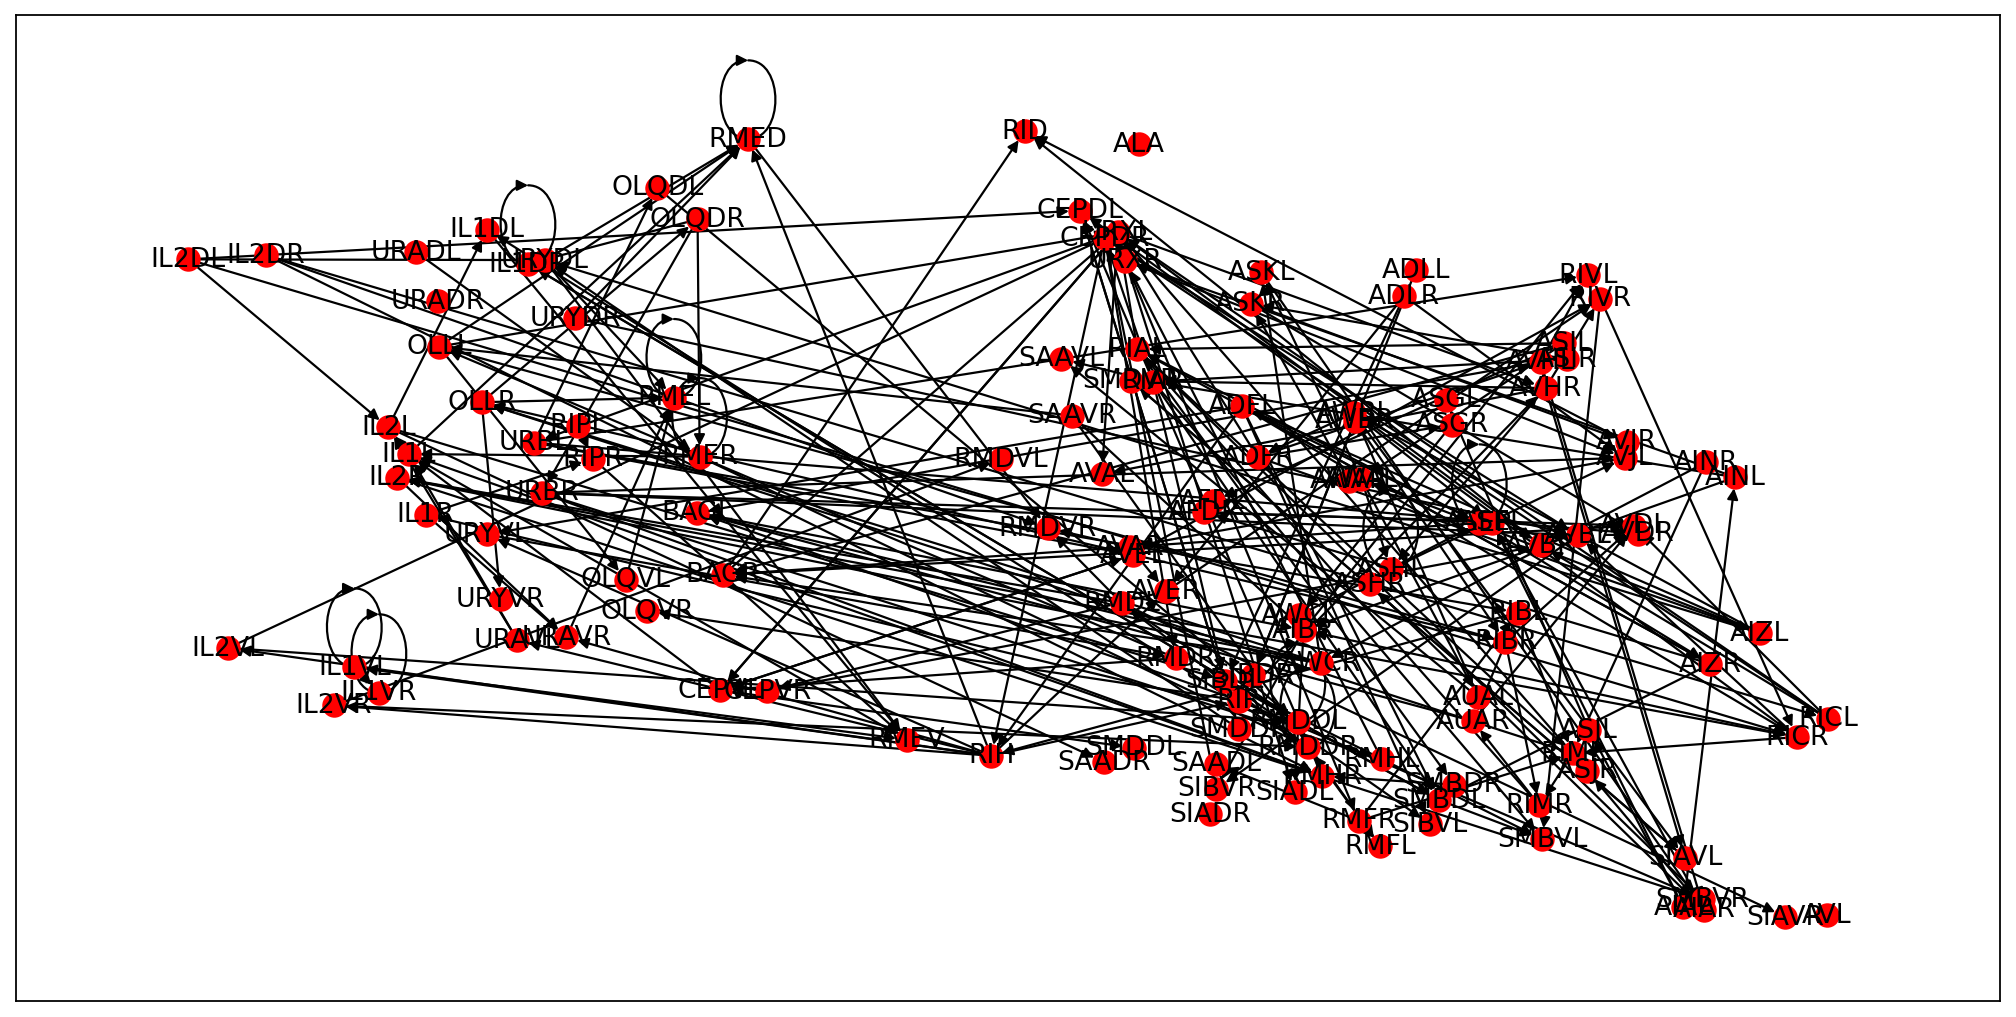

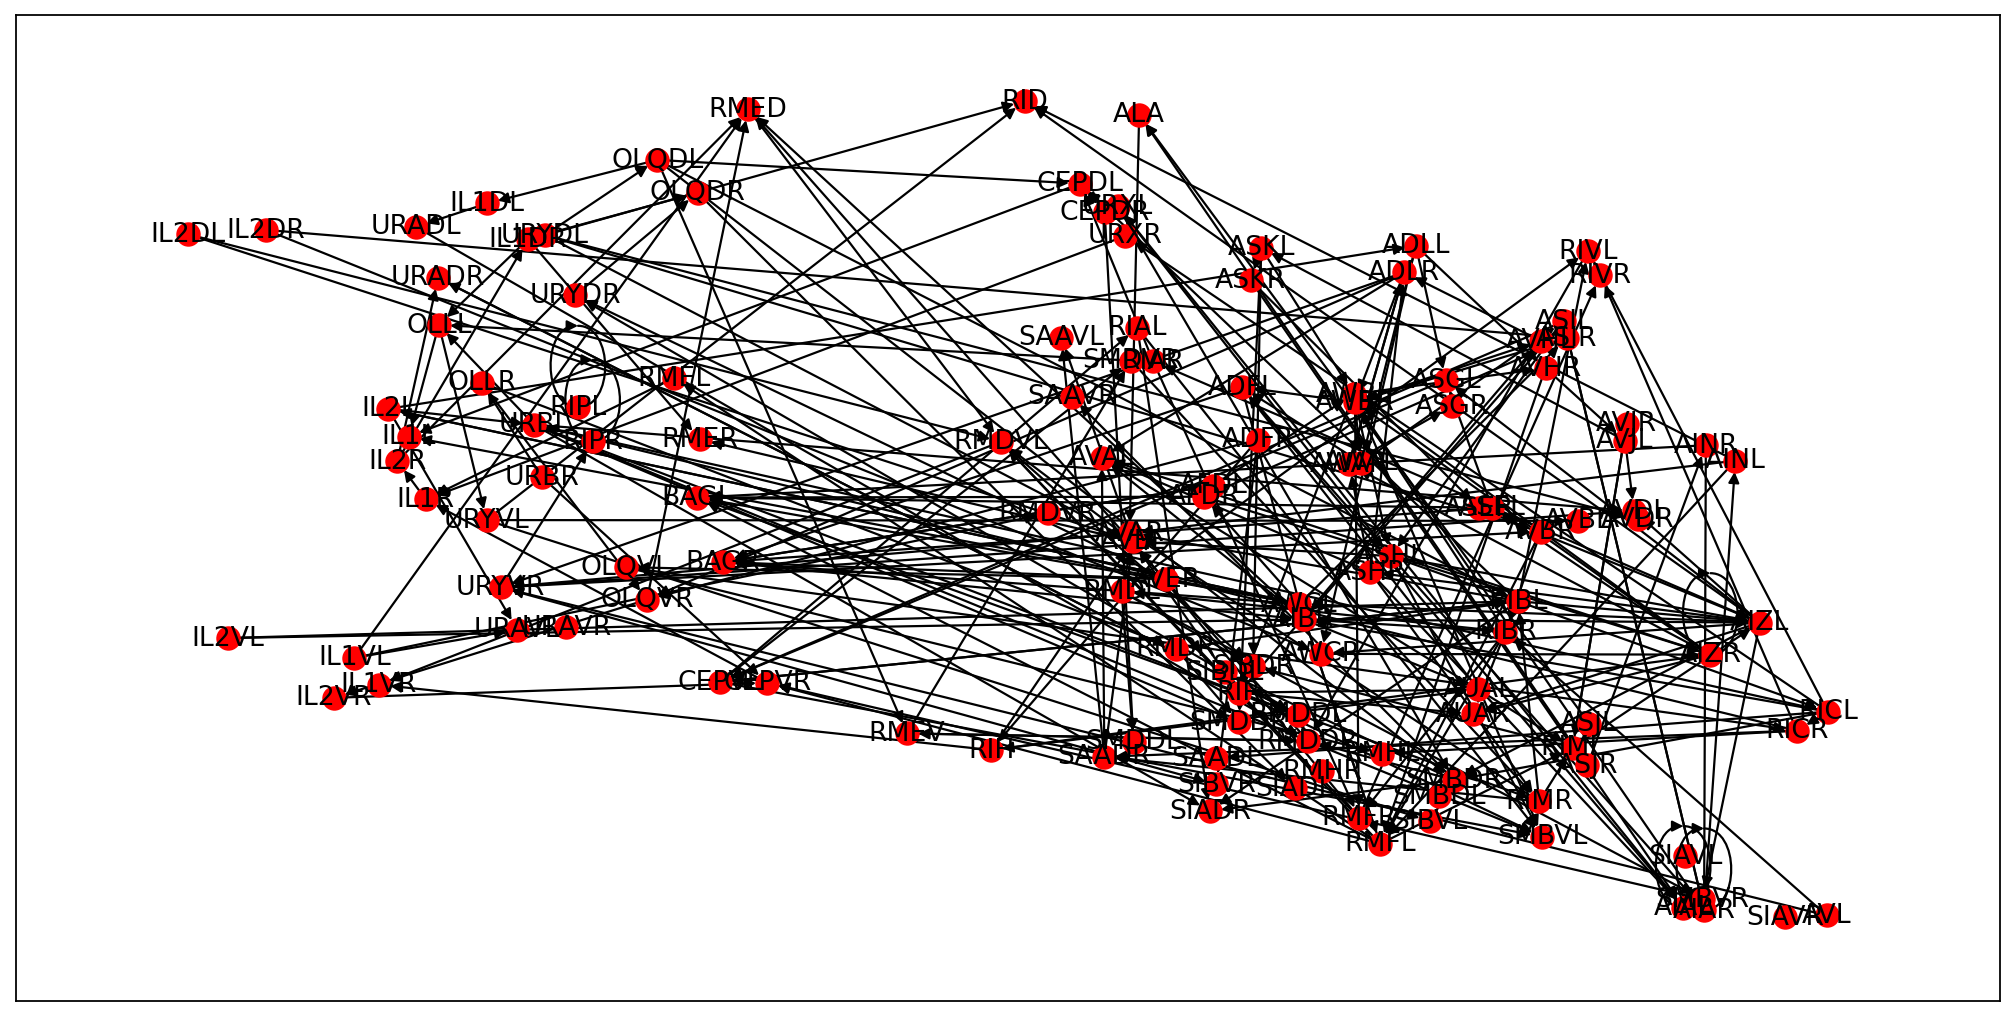

In [ ]:
plot2D(graphs.G_unique_W7, labels=True, darkmode=False)
plot2D(graphs.G_unique_W8, labels=True, darkmode=False)